# Project: Investigate a Dataset (No-show for Medical appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k+ medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

In [1]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.0MB/s eta 0:00:01  4% |█▎                              | 419kB 18.6MB/s eta 0:00:01    32% |██████████▍                     | 3.4MB 22.0MB/s eta 0:00:01    42% |█████████████▋                  | 4.4MB 21.1MB/s eta 0:00:01    52% |████████████████▉               | 5.5MB 22.7MB/s eta 0:00:01    70% |██████████████████████▊         | 7.4MB 19.6MB/s eta 0:00:01    79% |█████████████████████████▌      | 8.3MB 17.5MB/s eta 0:00:01    89% |████████████████████████████▋   | 9.3MB 17.4MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.7MB/s eta 0:00:01  2% |▉                               | 327kB 16.8MB/s eta 0:00:01    18% |█████▊                          | 2.4MB 22.6MB/s eta 0:00:01    32% |██████████▌                     | 4.4MB 21.6MB/s eta 0:00:01    50% |████████████████▎               | 6.8MB 21.4MB/s eta 0:00:01    58% |██████████████████▊             | 7.8MB 19.3MB/s eta 0:00:01    73% |███████████████████████▌    

### Dataset Description 

- **PatientId** - Patient Identification number

- **AppointmentID** - Appointment Identification number

- **Gender** - Male (M) or Female (F) 

- **ScheduledDay** - The day appointment was set up

- **AppointmentDay** - The actual appointment date

- **Age** - How old the patient is

- **Neighbourhood** - Location of the hospital

- **Scholarship** - Whether or not the patient is enrolled in Brasilian welfare program

- **Hipertension**  Whether or not the patient suffer from Hypertension

- **Diabetes** - Whether or not the patient suffer from Diabetes

- **Alcoholism** - Whether or not the patient has Alcoholic problem

- **Handcap** - Whether or not the patient is handicap and how many patient has

- **SMS_received** - Whether or not the patient received a reminder sms on the appointment

- **No-show** - Whether or not the patient show up for the appointment ("**No**" means was available, "**Yes**" means not available)

 ### Question(s) for Analysis
> What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

<a id='wrangling'></a>
## Data Wrangling


#### General Properties

In [2]:
# importing all the necessary package and reading the csv file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
#checking the rows to understand the dataset structure
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [4]:
#understanding some statistic of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- PatientId and AppointmentID datatype needs to change to float <br>
- Mininum age cannot be -1 and so it will be dropped <br>
- Hipertension is not spelt correctly <br>
- The maximum handicap a patient has is 4

In [5]:
#checking if there is not missing values and the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- The are **no missing** values <br>
- Some of the columns datatype needs to change e.g PatientID, AppointmentID, ScheduledDay, AppointmentDay)

In [6]:
# checking for the number of rows and columns
df.shape

(110527, 14)

- The dataset has **110527 rows** and **14 columns**

In [7]:
# Checking the data for duplicated rows
df.duplicated().sum()

0

- There are **no duplicates**

</a>


### Data Cleaning

In [8]:
#renaming the rows for proper row format and spelling correction
df=df.rename(columns = {'No-show' : 'No_show', 'Hipertension' : 'Hypertension'})

In [9]:
#changing PatientID to integer ad then to string
df['PatientId'] = df['PatientId'].astype(int) #to drop the .0 of the float type
df['PatientId'] = df['PatientId'].astype(str)

In [10]:
#changing AppointmentID to string
df['AppointmentID'] = df['AppointmentID'].astype(str)

In [11]:
#since we cannot have a negative age, drop the row with negative age
df.drop(df[df['Age'] < 0].index, inplace = True)

In [12]:
#replace and remove "T" and "Z" in the ScheduledDay and AppointmentDay so it can be formatted into a datetime

df['ScheduledDay'] = df['ScheduledDay'].str.replace("T"," ")
df['ScheduledDay'] = df['ScheduledDay'].str.replace("Z","")
df['AppointmentDay'] = df['AppointmentDay'].str.replace("T"," ")
df['AppointmentDay'] = df['AppointmentDay'].str.replace("Z","")

In [13]:
# change the ScheduledDay and AppointmentDay to a datetime format
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [14]:
# extract the date alone from the datetime in ScheduledDay
df['ScheduledDay'] = df['ScheduledDay'].dt.date

In [15]:
#confirm all the format once again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null object
AppointmentID     110526 non-null object
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hypertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No_show           110526 non-null object
dtypes: datetime64[ns](1), int64(7), object(6)
memory usage: 12.6+ MB


In [16]:
# rejust the ScheduledDay to a datetime format because the date extracted from the code above changed the format to a string
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [17]:
# reconfirm all the datatype again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null object
AppointmentID     110526 non-null object
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns]
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hypertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No_show           110526 non-null object
dtypes: datetime64[ns](2), int64(7), object(5)
memory usage: 12.6+ MB


In [18]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [19]:
#since we cannot have a negative age, drop the row with negative age
df.drop(df[df['Age'] < 0].index, inplace = True)

In [20]:
#create a year, month weekday and hour column for AppointmentDay where app stands for appointment in the code below
df['app_year'] = pd.DatetimeIndex(df['AppointmentDay']).year
df['app_month'] = pd.DatetimeIndex(df['AppointmentDay']).month
df['app_weekday'] = pd.DatetimeIndex(df['AppointmentDay']).day_name()

In [21]:
# Add date difference date_diff column (date_diff is the days difference bwt ScheduledDay and AppointmentDay)
df['date_diff'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [22]:
#confirm if all the adjustments are made
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,app_year,app_month,app_weekday,date_diff
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016,4,Friday,0


In [23]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,app_year,app_month,date_diff
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.0,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,2016.0,5.210041,10.183794
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.0,0.473776,15.255034
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0,4.000000,-6.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0,5.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0,5.000000,4.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2016.0,5.000000,15.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2016.0,6.000000,179.000000


Sighted another problem - We have **unrealistics date_diff** with -6. We are dropping those unrealistic date_diff

In [24]:
#checking the list of all unrealistics date_diff
df[df['date_diff'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,app_year,app_month,app_weekday,date_diff
27033,7839272661752,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,2016,5,Monday,-1
55226,7896293967868,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,2016,5,Tuesday,-1
64175,24252258389979,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,2016,5,Wednesday,-1
71533,998231581612122,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,2016,5,Thursday,-6
72362,3787481966821,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,2016,5,Tuesday,-1


In [25]:
#since we cannot have a negative date_diff, we are dropping the row with negative date_diff
df.drop(df[df['date_diff'] < 0].index, inplace = True)

In [26]:
#confirm if we do not have an unrealistic date_diff
df[df['date_diff'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,app_year,app_month,app_weekday,date_diff


In [27]:
df.shape

(110521, 18)

In conclusion we now have a clean dataset with **110521** rows and **18** columns to explore

</a>

</a>

<a id='eda'></a>
## Exploratory Data Analysis

> We will have to first define a function that will take in 2 arguments and then plot a side by side bar graph of 'No_show' column in relations to other fields we want to compare it with.


In [28]:
# defining a function called com_bar which stands for compare bar side by side
def com_bar(df, col):
     df['No_show'].groupby(df[col]).value_counts(normalize=True).unstack('No_show').plot(kind='bar',rot=0,width=0.8, figsize=(12,6))
     plt.title("Available/Not Available for {}".format(col).title(), fontsize = 16, weight = "bold")
     plt.xlabel(col,fontsize = 13,weight = 'bold')
     plt.ylabel("Occurrence",fontsize = 13,weight = 'bold')

In [29]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,app_year,app_month,app_weekday,date_diff
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016,4,Friday,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016,4,Friday,0


### Research Question 1 (How is Appointment WeekDay Related to Whether a Patient Shows up or Not)

In [30]:
df.app_year.value_counts()

2016    110521
Name: app_year, dtype: int64

In [31]:
df.app_month.value_counts()

5    80836
6    26450
4     3235
Name: app_month, dtype: int64

In [32]:
df.app_weekday.value_counts()

Wednesday    25866
Tuesday      25638
Monday       22713
Friday       19019
Thursday     17246
Saturday        39
Name: app_weekday, dtype: int64

The cleaned dataset contains information for the **second quarter of 2016** and most appointment were books in the **fifth month of 2016 from Monday to Friday**. Very little records during weekend

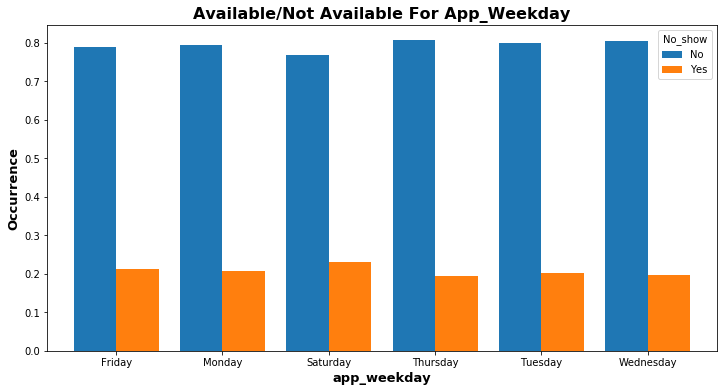

In [33]:
#propability distribution per Weekdays
com_bar(df,'app_weekday')

### Finding(s)
> - Saturday has more absent patient than other weekdays.
> - People who set appointment date to weekend are likely not to attend the appointment, 

<ar>

### Research Question 2 (How is Gender Related to Whether a Patient Shows up or Not)

In [35]:
df.Gender.value_counts()

F    71836
M    38685
Name: Gender, dtype: int64

- We have more Female patient who booked appointment than male

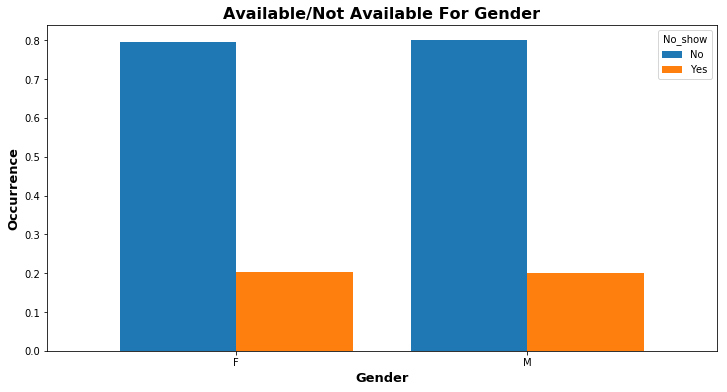

In [36]:
#propability distribution per Gender
com_bar(df,'Gender')

### Finding(s)
> - Gender does not necessary have effect on whether or not a patient will show up for an appointment 

<br>

### Research Question 3 (How is Scholarship Related to Whether a Patient Shows up or Not)

In [37]:
df.Scholarship.value_counts()

0    99660
1    10861
Name: Scholarship, dtype: int64

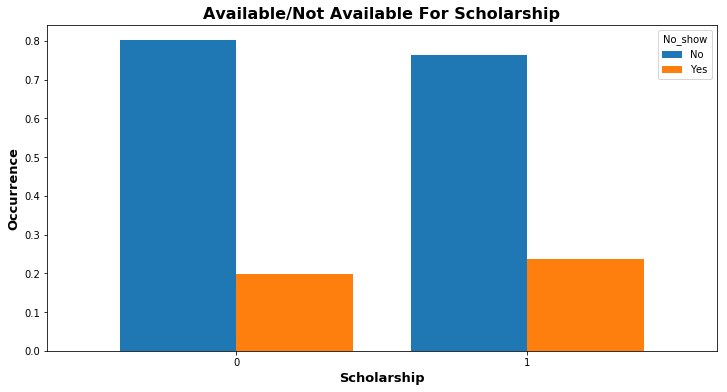

In [38]:
#propability distribution per Scholarship
com_bar(df,'Scholarship')

### Finding(s)
> - Scholarship does not necessary have effect on whether or not a patient will show up for an appointment 

<br>

### Research Question 4 (How is Handicap Related to Whether a Patient Shows up or Not)

In [39]:
#count of each category of Handicap
df.Handcap.value_counts()

0    108282
1      2040
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [40]:
#Total count of Handicap
df.Handcap.count()

110521

In [41]:
# percentage contribution of each variable in handicap
(df.Handcap.value_counts()/df.Handcap.count())*100

0    97.974141
1     1.845803
2     0.165579
3     0.011762
4     0.002714
Name: Handcap, dtype: float64

- people with no handicap has the highest percentage contributed to the Handicap category with approximately **98%**

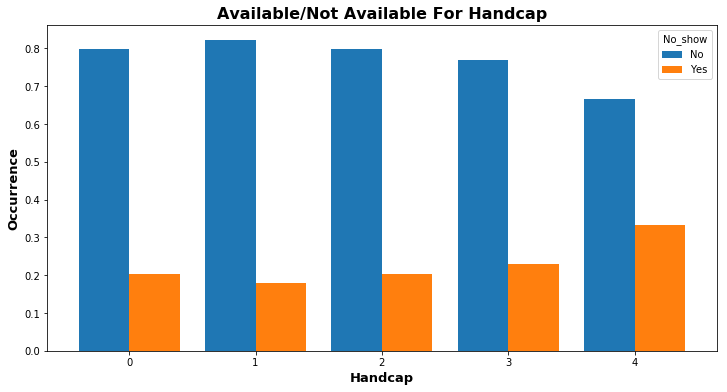

In [42]:
#propability distribution per Handicap
com_bar(df,'Handcap')

### Finding(s)
> - We **might** want to say that the higher the number of handicap, the higher the chances of missing an appointment but because those with handicap is not up to **3%** of the percentage contribution, we **cannot** conclude that Handicap has effect on whether or not a patient will show up for an appointment

### Research Question 5 (How is Gender Related to Whether a Patient Shows up or Not)

In [43]:
df.SMS_received.value_counts()

0    75039
1    35482
Name: SMS_received, dtype: int64

- We have more patients who did not receive SMS reminder than those who did

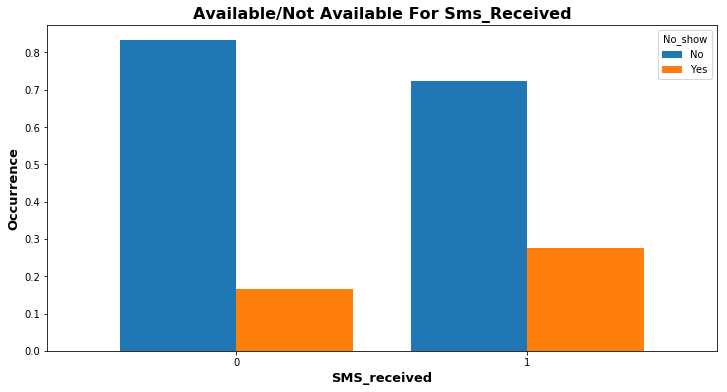

In [44]:
#propability distribution per SMS received
com_bar(df,'SMS_received')

### Finding(s)
> - We can see that from patient who received SMS,we have a higher ratio of patient who did not turn up for appointment 
> - SMS_received does not really have effect on whether or not a patient will turn up for an appointment

<br>

### Research Question 5 (How is Age Related to Whether a Patient Shows up or Not)

In [45]:
df['Age'].describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

- The minimum and maximum age are **0** and **155**
- **75%** of the patients are between the ages of 0 and 55 

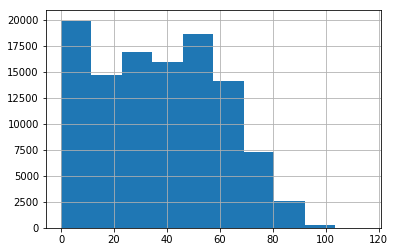

In [46]:
# Distribution of Age
df['Age'].hist();

Let us create a bin to group the Age in order to categorize Age
- 0 - 13 = Child
- 13-19 = Teenage
- 19-60 = Adult
- 60 - 116 = Elderly

In [47]:
bins = [0, 13, 19, 60, 116]
labels = ['Child','Teenage','Adult','Elderly']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [48]:
df.Age_Group.value_counts()

Adult      60351
Elderly    19761
Child      18599
Teenage     8271
Name: Age_Group, dtype: int64

Majority of patient who booked appointment are Adult

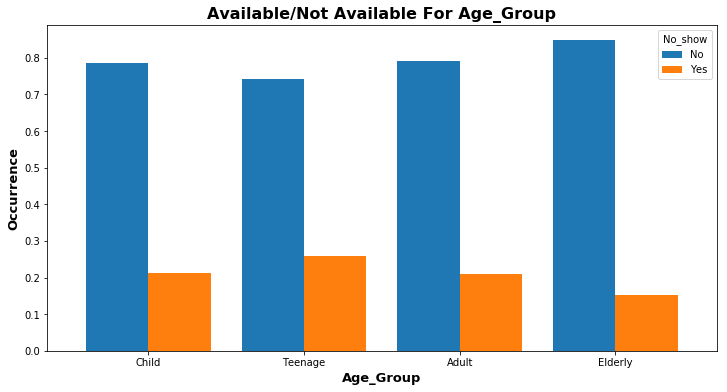

In [49]:
#propability distribution per Age Group
com_bar(df,'Age_Group')

### Finding(s)
> - We can see more appointment turn up from Elderly patient, maybe because at that age they are more conscious about their health
> - Teenage Age group are more likely not to show up for an appointment
> - Age has an effect on whether or not a patient is likely to show up for their medical appointment

<br>

<a id='conclusions'></a>
## Conclusions

### Finding(s)

Appointment Day
> - Saturday has more absent patient than other weekdays.
> - People who set appointment date to weekend are likely not to attend the appointment

Gender
> - Gender does not necessary have effect on whether or not a patient will show up for an appointment

Scholarship
> - Scholarship does not necessary have effect on whether or not a patient will show up for an appointment 

Handicap
> - We **might** want to say that the higher the number of handicap, the higher the chances of missing an appointment but because those with handicap is not up to **3%** of the percentage contribution, we **cannot** conclude that Handicap has effect on whether or not a patient will show up for an appointment

SMS Received
> - We can see that from patient who received SMS,we have a higher ratio of patient who did not turn up for appointment 
> - SMS_received does not really have effect on whether or not a patient will turn up for an appointment

Age Group
> - We can see more appointment turn up from Elderly patient, maybe because at that age they are more conscious about their health
> - Teenage Age group are more likely not to show up for an appointment
> - Age has an effect on whether or not a patient is likely to show up for their medical appointment

### Limitations

> - AppointmentDay did not not the actual time of appointment having this might have helped in the probabilty of Show/No Show by hour
> - The reason for appointment data was not captured
> - We had an unrealistic age (-1)

In [50]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0